Ez az második házifeladat azon Mérnökinformatikus BSC hallgatók részére akik a 2023/24/1 félévben Képfeldolgozást hallgatnak.

In [108]:
# 2023.10.29
# Fülöp Zalán

### Task
Develop a system that takes the given pictures as input and system output should be the picture with higlights the corners of the box with lines as shown in the example below

### Data
You have 2 pictures of same box with different backgrounds. Your method should work for both pictures.

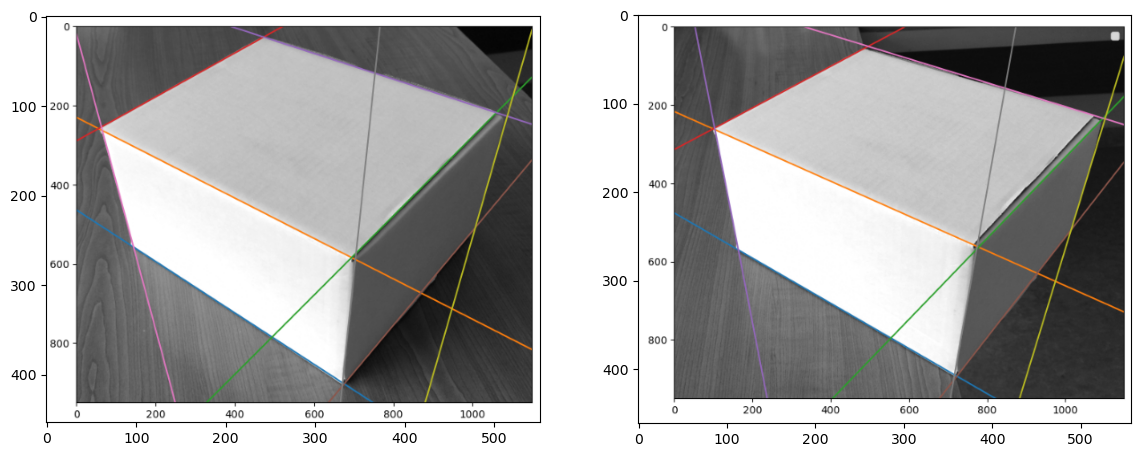

In [109]:
#*: referencia
from PIL import Image
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
axes[0].imshow(Image.open('box_0_sample.png'));
axes[1].imshow(Image.open('box_1_sample.png'));

In [1]:
# import required modules
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from scipy import ndimage
from skimage import color
import cv2
from skimage.transform import hough_line, hough_line_peaks
import random

s_elem = np.ones((3,3))

In [2]:
# A simple function to convert 2D image to 3D gray image
def to_3d(labels):
    base = np.zeros([labels.shape[0], labels.shape[1], 3])
    for i in range(3):
        base[:,:,i] = labels.astype(bool)
    return base.astype(np.uint8)

# The simple fuction to crop the image. I made this function because it can crop both rgb and 2D image
# And i didnt have to do it manually again and again
def cropImage(image):
    img_arr = np.array(image)
    # cropping image to remove the extra stuff from the pic
    cropped_img = img_arr[250:1350,500:1650]
    return cropped_img
# This function is basically to remove redundant code in case of more pics
def basicImageSettings(image):
     # covert image to grayscale 
    grayImage = image.convert('L')
    return cropImage(grayImage)
# This creates helping mask for mask2 I didnt wanted to do static pixel removal in main function thats why 
# i created a separate function for that
def maskForMask2(image):
    helping_mask = image.copy()
    helping_mask[:,:700] = 0
    helping_mask[945:,:] = 0
    helping_mask[:50,:] = 0
    return helping_mask
# This function takes an image number (1 or 2, stating the first and second image) as input 
# I didn't import both pictures in advance because that is only waste of memory
# It returns a 3D box image with black background which makes it easy for canny to detect edges 
# mask1 highlights the front and top of the box and mask2 highlights the side of the box
# combining 2 masks creates the full mask which is box
def separateBoxFromImage(imageNum):
    if imageNum == 1:
        #open an image
        image = Image.open('box_0_resi.jpg')
        #cropped grayscale image:
        cropped_img = basicImageSettings(image)
        #creating mask1
        mask1 = cropped_img > 160
        # creating mask2
        mask2 = maskForMask2(cropped_img) > 75
        #statically removing unnecassary areas
        mask2[0:280,:]=0
        mask2[900:,850:] = 0
        mask2[:,1080:]= 0
        mask2 = ndimage.binary_closing(mask2.copy(),s_elem)   
        
    elif imageNum == 2:
        image = Image.open('box_1_resi.jpg')
        #cropped grayscale image:
        cropped_img = basicImageSettings(image)
        #creating mask1
        mask1 = cropped_img > 150
        # creating mask2,
        mask2 = maskForMask2(cropped_img) > 80
    else:
        print("wrong image number")
    
    # conerting box image to 3d so it can be combined with original cropped image
    box = to_3d(mask1+mask2)
    
    return box,image


def detect_lines(image):
    # Convert the image to grayscale for canny edge detector
    gray_image = color.rgb2gray(image)
    # Apply the Canny edge detector
    edges = cv2.Canny((gray_image *255).astype(np.uint8), 50, 150,apertureSize=3)

    # Perform Hough Line Transform
    h, theta, d = hough_line(edges)

    # Find peaks in Hough space
    _, angles, dists = hough_line_peaks(h, theta, d)
    
    return angles, dists,edges

def plot_lines(original_image,dist,angles,edges):
    # Plot the original image
    plt.imshow(original_image)
    
    # made a fun array so i can choose random colors for the lines
    # you can add more colors to make diagram colorful
    colors = ['-r','-g','-b','-o','purple','brown']
    # Plot the detected lines on the original image
    for angle, dist in zip(angles, dists):
        # get points for lines 
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - edges.shape[1] * np.cos(angle)) / np.sin(angle)
        plt.plot((0, edges.shape[1]), (y0, y1), random.choice(colors))
    # add title to the plot
    plt.title('Detected Lines')
    plt.show()


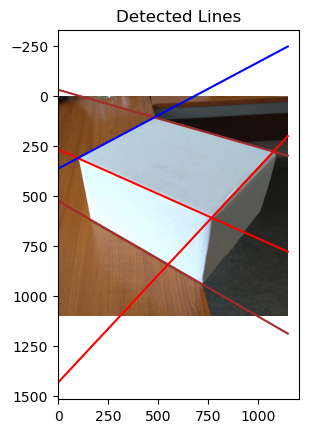

In [5]:
# get box and original image 
#---------------Change its value (1,2) to see different images-------------
# firstimage :
# box,color_image = separateBoxFromImage(1)
# secondimage:
# box,color_image = separateBoxFromImage(2) 
box,color_image = separateBoxFromImage(2) 


# stored the color box image into same variable {i didn't want to declare a new variable :)}
box = cropImage(color_image)*box

#get the values of angles,dists and edges for plotting
# i gave the box without background for canny detection to make the algrithm life easier
angles,dists,edges= detect_lines(box)
#plotting lines on image
plot_lines(cropImage(color_image),dists,angles,edges)

In [113]:
#  !!!!!!!!!!!!ALERT MAIN CODE FINISHED!!!!!!!!!!!!!!!!!!!!!!
# All the rest is Practice code (basically hit and trial code )

In [114]:
original_img;

In [115]:
img_arr = np.array(original_img)
clr_img_arr = np.array(clr_img)

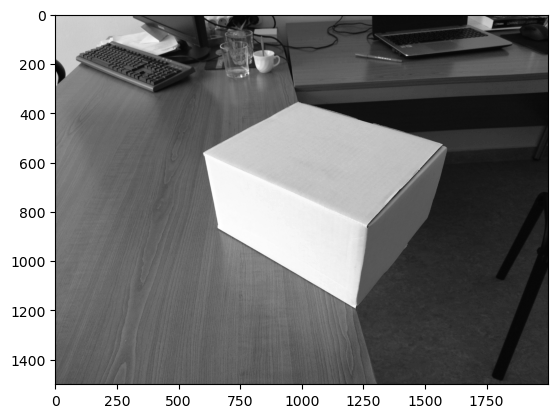

In [116]:
plt.imshow(img_arr, 'gray')

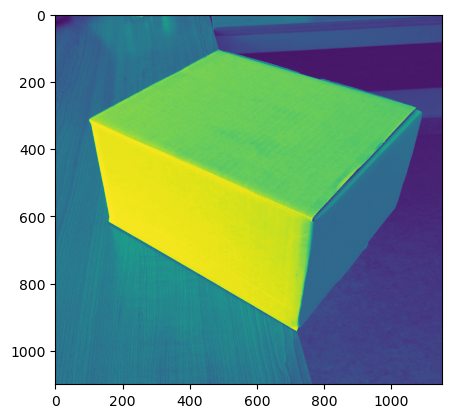

In [117]:
# cropping parameters : X 500 - 1650  Y 250- 1350
cropped_img = img_arr[250:1350,500:1650]
clr_cropped_img = clr_img_arr[250:1350,500:1650]
plt.imshow(cropped_img)

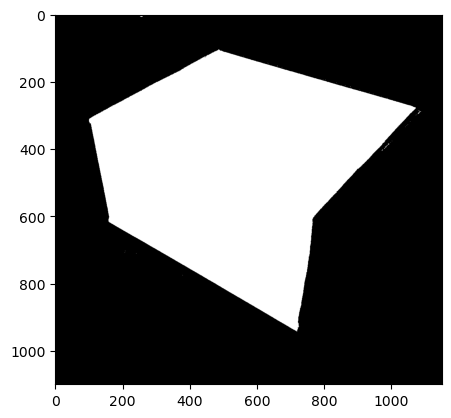

In [118]:
plt.imshow(cropped_img>150,'gray')

In [119]:
#In order to reduce noise i will mask the box separately and then join it with background afterwards
#I am masking front and back of the box one by one because its easier to do so beca
mask1 = cropped_img > 150


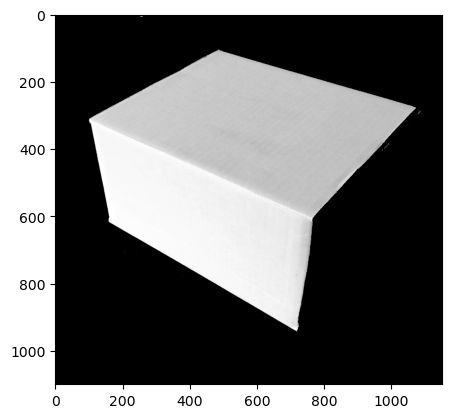

In [120]:
# masking the rgb image with previously created mask
plt.imshow(cropped_img*mask1, 'gray')

In [121]:
box_front = cropped_img*mask1

In [122]:
# testing 
test_mask = cropped_img.copy()

In [123]:
test_mask[:,0:700] = 0

In [124]:
test_mask[945:,:] = 0

In [125]:
test_mask[:50,:] = 0

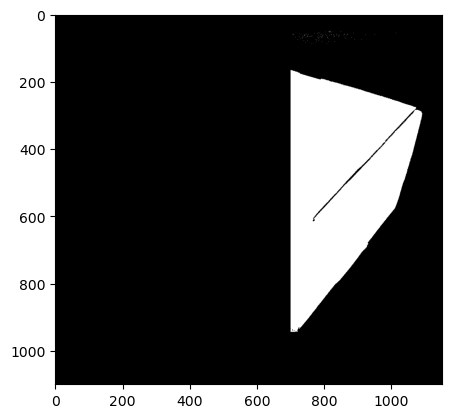

In [126]:
plt.imshow(test_mask>74,'gray')

In [127]:
mask2 = test_mask>80

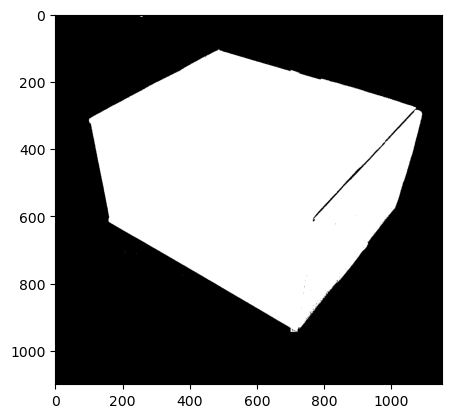

In [128]:
plt.imshow(mask2+mask1,'gray')

In [129]:
full_mask = mask1+mask2 

In [130]:
full_box = full_mask*cropped_img
full_box_copy = full_box.copy() # for getting background separately

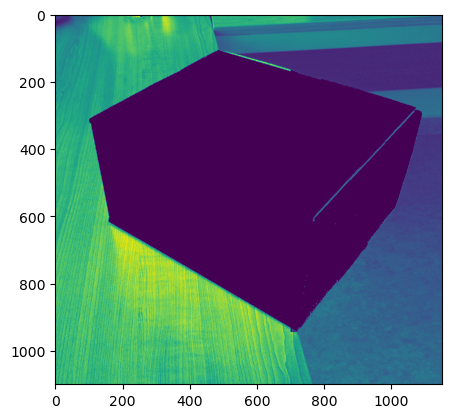

In [131]:
background = cropped_img - full_box_copy
plt.imshow(background)

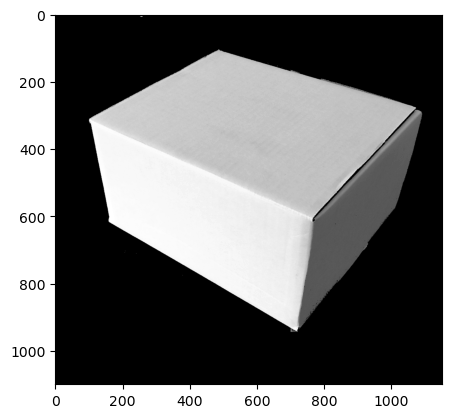

In [132]:
plt.imshow((full_box),'gray')

In [133]:
from skimage.transform import hough_line, hough_line_peaks
from skimage import feature

In [134]:
import cv2

In [135]:
#edges = cv2.Canny(full_box, 50,150,apertureSize = 3)

In [136]:
edges2 = feature.canny(full_box,sigma=1)

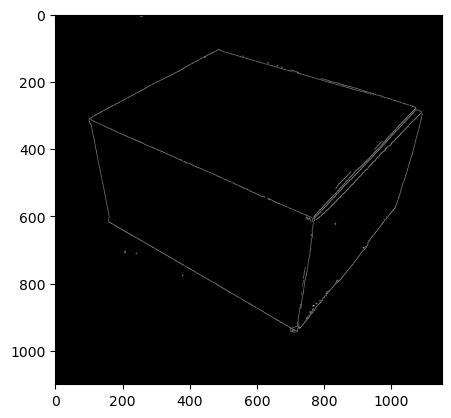

In [137]:
s_elem =  np.ones((1, 1))
plt.imshow(edges2,'gray')

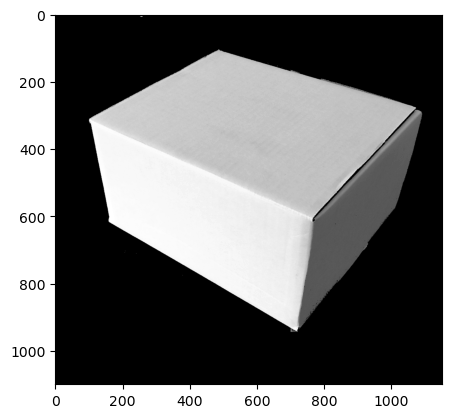

In [138]:
plt.imshow(full_box,'gray')

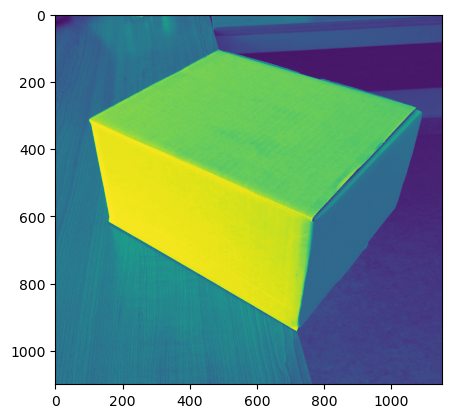

In [139]:
plt.imshow((background+full_box),)

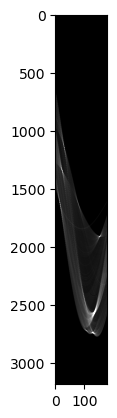

In [140]:
#plt.imshow(edges2)
hspace, angles, dists = hough_line(edges2)
accum, angles2, dists2 = hough_line_peaks(hspace, angles, dists, threshold=0.3, num_peaks=7)
plt.imshow(hspace, aspect=0.4, vmax=50, cmap='gray');

In [141]:
np.degrees(angles2)

array([-74., -60., -66.,  43.,  62.,  45., -11.])

In [142]:
def line(x, angle, r):
    return (r - x*np.cos(angle)) / np.sin(angle) # negatív előjel

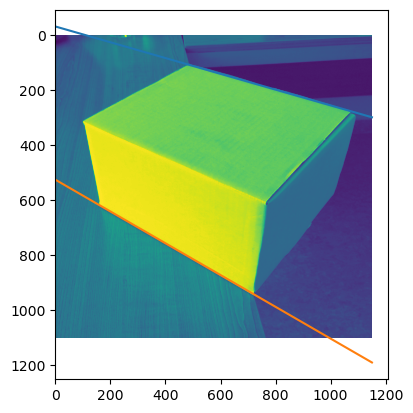

In [143]:
plt.imshow(cropped_img)
plt.ylim
x = np.linspace(0, full_box.shape[1], 100)
for i in np.arange(2):
    plt.plot(x, line(x, angles2[i], dists2[i]));

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import hough_line, hough_line_peaks
import random

image = Image.open('box_1_resi.jpg')

def detect_lines(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)
    #gray_image = image
    #gray_image = image.convert('L')
    # Apply the Canny edge detector
    edges = cv2.Canny((gray_image * 255).astype(np.uint8), 50, 150)

    # Perform Hough Line Transform
    h, theta, d = hough_line(edges)

    # Find peaks in Hough space
    _, angles, dists = hough_line_peaks(h, theta, d)
    
    return angles, dists,edges

def plot_lines(original_image,dist,angles,edges):
    # Plot the original image
    plt.imshow(original_image)
    
    
    colors = ['-r','-g','-b','-o','purple','brown']
    # Plot the detected lines on the original image
    for angle, dist in zip(angles, dists):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - edges.shape[1] * np.cos(angle)) / np.sin(angle)
        plt.plot((0, edges.shape[1]), (y0, y1), random.choice(colors))

    plt.title('Detected Lines')
    plt.show()
    


In [145]:
color_img = clr_cropped_img * to_3d(full_box)
full_box.shape

(1100, 1150)

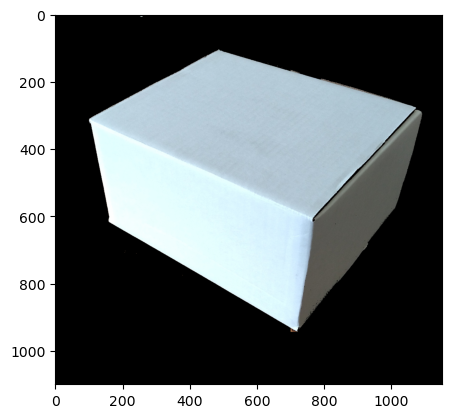

In [146]:
plt.imshow(color_img,'gray')

In [148]:
new = detect_lines(color_img)

In [149]:
def to_3d(labels):
    base = np.zeros([labels.shape[0], labels.shape[1], 3])
    for i in range(3):
        base[:,:,i] = labels.astype(bool)
    return base.astype(np.uint8)

In [150]:
full_box.shape

(1100, 1150)

In [151]:
clr_cropped_img.shape

(1100, 1150, 3)

In [152]:
final_image =  background + color.rgb2gray(color_img)

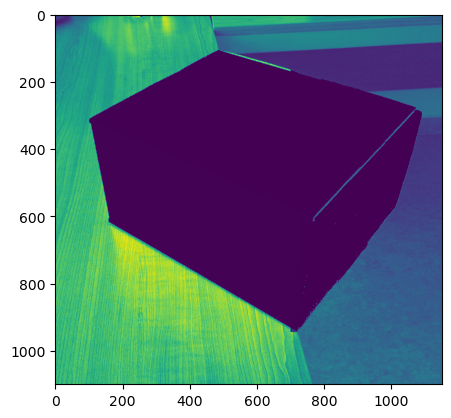

In [153]:
plt.imshow(final_image)